## Load Libraries

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins



## Loading data

Let's load an example dataset: the [palmerpenguins dataset](https://allisonhorst.github.io/palmerpenguins/). It was created by Allison Horst, Alison Hill and Kristen Gorman from data that Gorman collected on the islands of the Palmer Archipelago in Antarctica between 2007 and 2009. The multivariate dataset includes characteristics of the penguins including species and sex, body size measurements such as bill length, bill depth, flipper length and body mass, as well as location and year of measurements. You can read more about this dataset [here](https://journal.r-project.org/articles/RJ-2022-020/).



<div align="center">
<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width="75%">
<figcaption>Figure 1. Artwork by @allison_horst</figcaption>
</div>
<div align="center">
<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width="75%">
<figcaption>Figure 2. Artwork by @allison_horst</figcaption>
</div>





In [2]:
penguins = load_penguins() 

# if you had trouble installing the package, you can also read in the data from the csv file by uncommenting the line below.
# penguins = pd.read_csv("penguins.csv")


You have created a new object known as a pandas `DataFrame`, with the contents of the package or the CSV. Think of it as a spreadsheet, but with a lot more useful features for data analysis. It has several methods we can use to handle and analyse the data.


Read more about the pandas `DataFrame` object [here](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html#pandas-data-table-representation). 

## Overview of data
We can peek at the data using the `.head()` function.

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


We notice that there are a lot of different measurements in the form of columns. For the first section we are going to ask questions about how bill and flipper measurements vary with species, so we"ll make a smaller dataframe containing only the `species` column and columns containing length measurements.

In [4]:
penguins_lengths = penguins[["species", "bill_length_mm", "bill_depth_mm", "flipper_length_mm"]]
penguins_lengths.head() # Gives us the first 5 rows of the dataframe.
# penguins.head(10) # Gives us the first 5 rows of the dataframe.


,species,bill_length_mm,bill_depth_mm,flipper_length_mm
0,Adelie,39.1,18.7,181.0
1,Adelie,39.5,17.4,186.0
2,Adelie,40.3,18.0,195.0
3,Adelie,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0


### Data cleanup
We noticed that the `DataFrame` above contain `NaN` values. This means these entries are missing data. 
Let's first find out which rows contain `NaN` values:

In [5]:
penguins_lengths[penguins_lengths.isnull().any(axis = 1)] # Gives us the rows with at least one missing values.

,species,bill_length_mm,bill_depth_mm,flipper_length_mm
3,Adelie,NaN,NaN,NaN
271,Gentoo,NaN,NaN,NaN


Missing data sometimes create issues for analyses and visualiszation, so we want to drop all the rows that contain `NaN` values with the `.dropna()` function:


In [6]:
penguins_lengths = penguins_lengths.dropna().reset_index(drop = True) # Drop rows with missing values and re-numbers the rows.
penguins_lengths.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm
0,Adelie,39.1,18.7,181.0
1,Adelie,39.5,17.4,186.0
2,Adelie,40.3,18.0,195.0
3,Adelie,36.7,19.3,193.0
4,Adelie,39.3,20.6,190.0


### Quick summary of the data 
First we get a summary of the data with the `.describe()` function.

In [7]:
penguins_lengths.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm
count,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205
std,5.459584,1.974793,14.061714
min,32.100000,13.100000,172.000000
25%,39.225000,15.600000,190.000000
50%,44.450000,17.300000,197.000000
75%,48.500000,18.700000,213.000000
max,59.600000,21.500000,231.000000


Since we are interested in the species, we take a look at what is in the `species` column. There are three species.

In [8]:
penguins_lengths.species.unique() # Gives us the unique values in the species column.

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

## Question 1: how long are the bills of penguins of different species?

(Or, looking at one dependent variables against one independent variable)

We will approach Question 1 with a very simple analysis workflow: **split-apply-combine**. Many of our scientific experiments also follow this workflow: We collect some measuments (value) from individuals belonging to different groups (key), split the data according to the grouping, apply a summary function to each group, and then aggregate the results. After that you can visualise the results. For example, Figure 3 shows how you would plot a simple bar plot with the bill length data.

<div align="center">
<img src="images/splitapplycombinevisualise.png" width="75%">
<figcaption>Figure 3. The split-apply-combine work flow.</figcaption>
</div>


In [9]:
penguins_lengths.groupby("species").mean() # Gives us the mean values for each species.

,bill_length_mm,bill_depth_mm,flipper_length_mm
species,,,
Adelie,38.791391,18.346358,189.953642
Chinstrap,48.833824,18.420588,195.823529
Gentoo,47.504878,14.982114,217.186992


In [10]:
penguins_lengths.groupby("species").sem() # Gives us the standard error of the mean for each species.

,bill_length_mm,bill_depth_mm,flipper_length_mm
species,,,
Adelie,0.216745,0.099010,0.532173
Chinstrap,0.404944,0.137687,0.864869
Gentoo,0.277882,0.088474,0.584731


### Plot an old-fashioned bar plot, which shows the mean and S.E.M. of each group
Luckily, a lot of these plotting functions already exist in data visualisation packages such as `seaborn`:

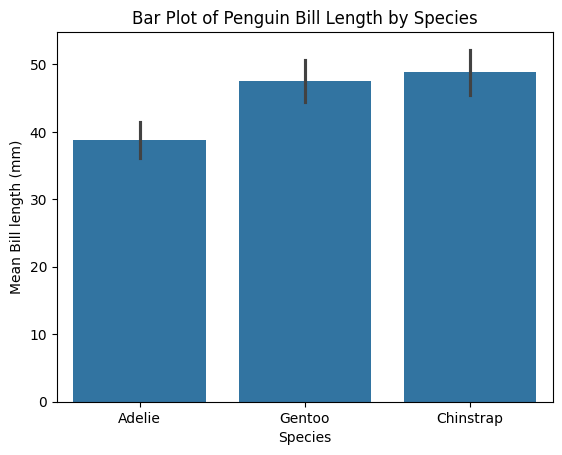

In [11]:
# ax1 = sns.barplot(data = penguins_lengths, 
#                   x = "species", 
#                   y = "bill_length_mm",
#                   errorbar = "se");

# # Axes should always be labelled.
# ax1.set(xlabel="Species", ylabel="Mean Bill length (mm)", title = "Bar Plot of Penguin Bill Length by Species");

ax1 = sns.barplot(data=penguins_lengths, 
                  x="species", 
                  y="bill_length_mm",
                  errorbar="sd");  # Use "sd" for standard deviation or a numeric value for confidence interval

# Axes should always be labelled.
ax1.set(xlabel="Species", ylabel="Mean Bill length (mm)", title="Bar Plot of Penguin Bill Length by Species")
plt.show()

### Plot a box plot, which shows the data quartiles 

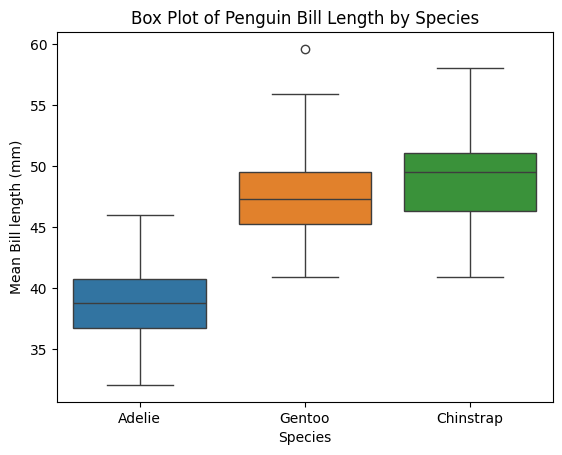

In [12]:
ax2 = sns.boxplot(data = penguins_lengths, 
                    x = "species", 
                    y = "bill_length_mm",
                   hue = "species");

ax2.set(xlabel="Species", ylabel="Mean Bill length (mm)", title = "Box Plot of Penguin Bill Length by Species");

### Plot a swarmplot, which shows all the data points

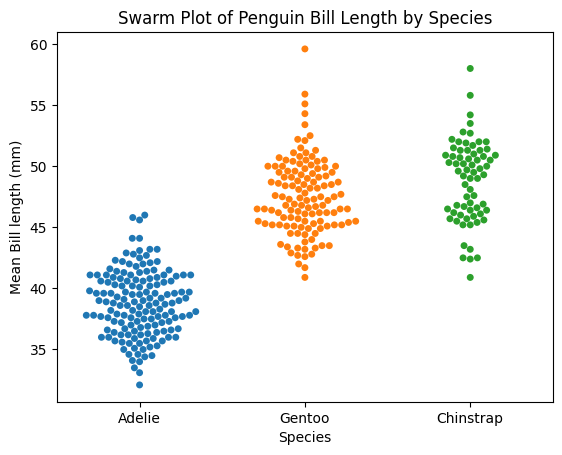

In [13]:
ax3 = sns.swarmplot(data = penguins_lengths, 
                    x = "species", 
                    y = "bill_length_mm",
                   hue = "species");

ax3.set(xlabel="Species", ylabel="Mean Bill length (mm)", title = "Swarm Plot of Penguin Bill Length by Species");

## Question 2: How do all the length metrics vary with species?
(Or, looking at more metrics systematically.)

In [14]:
penguins_lengths.head() # Let's revisit the DataFrame

,species,bill_length_mm,bill_depth_mm,flipper_length_mm
0,Adelie,39.1,18.7,181.0
1,Adelie,39.5,17.4,186.0
2,Adelie,40.3,18.0,195.0
3,Adelie,36.7,19.3,193.0
4,Adelie,39.3,20.6,190.0


We don't have to visualize only 1 metric at a time. We can look at all of the metrics at the same time. 
The plotting package `seaborn` has a function `catplot()` that does this automatically for you.

In [15]:
# `catplot` is short for "categorical plot", 
# where either the x-axis or y-axis consists of categories.

# This will produce an error - intentionally showing why we need to reshape the data
try:
    ax4 = sns.catplot(data=penguins_lengths, 
                kind="bar",   # there are several types of plots.
                # errorbar="sd",      # plot the error bars as ± standard deviation, use this line if you have seaborn 0.12.x
                ci="sd",      # plot the error bars as ± standard deviations, use this line if you have seaborn 0.11.x.
                col="species" # plot each species as its own column.
               )
    ax4.set_axis_labels("", "Length (cm)")
except ValueError as e:
    print(f"Error: {e}")
    print("\n(This error is generated because seaborn disallows catplot with 'wide' data)")

Error: The following variable cannot be assigned with wide-form data: `col`

(This error is generated because seaborn disallows catplot with 'wide' data)


##### Limits of wide-format data

The default 'wide' penguins `DataFrame` cannot be plotted by `seaborn.catplot`. 
To directly compare metrics between species, we need to _reshape_ the data.
Read more about wide and long data [here](https://medium.com/@khushi.gupta3104/long-vs-wide-data-pandas-melt-e2a9f03b5289#:~:text=Wide%20Format%20is%20where%20we,for%20a%20given%20data%20point.).

### Reshaping Data

Our `penguins_lengths` dataframe is in the wide-form (below left) and we want to turn it into the long-form (below right). In the original `penguins_lengths` dataframe, the data is organised by individuals (one individual penguin in each row) and the columns contain a mixture of variables that describe that individual. In a long-form dataframe, each row is an observation or data point, and each column is a variable that describe the data point. (Please read Hadley Wickham's [article](https://vita.had.co.nz/papers/tidy-data.pdf) to learn more about tidiness of datasets.) 
<div align="center">
<img src="./images/LongWide.png" width="75%">
<figcaption>Figure 4. The Long-form vs the Wide-form of your data</figcaption>

</div>


In [16]:
penguins_lengths # This is our wide table.

,species,bill_length_mm,bill_depth_mm,flipper_length_mm
0,Adelie,39.1,18.7,181.0
1,Adelie,39.5,17.4,186.0
2,Adelie,40.3,18.0,195.0
3,Adelie,36.7,19.3,193.0
4,Adelie,39.3,20.6,190.0
...,...,...,...,...
337,Chinstrap,55.8,19.8,207.0
338,Chinstrap,43.5,18.1,202.0
339,Chinstrap,49.6,18.2,193.0
340,Chinstrap,50.8,19.0,210.0


In [17]:
# The code in this section turns a wide table into a long table.
penguins_tidy = pd.melt(penguins_lengths.reset_index(), 
                    id_vars=["index","species"], 
                    var_name="metric", 
                    value_name="cm")
penguins_tidy = penguins_tidy.rename(columns = {"index": "ID"})

In [18]:
penguins_tidy # This is our long table.

,ID,species,metric,cm
0,0,Adelie,bill_length_mm,39.1
1,1,Adelie,bill_length_mm,39.5
2,2,Adelie,bill_length_mm,40.3
3,3,Adelie,bill_length_mm,36.7
4,4,Adelie,bill_length_mm,39.3
...,...,...,...,...
1021,337,Chinstrap,flipper_length_mm,207.0
1022,338,Chinstrap,flipper_length_mm,202.0
1023,339,Chinstrap,flipper_length_mm,193.0
1024,340,Chinstrap,flipper_length_mm,210.0


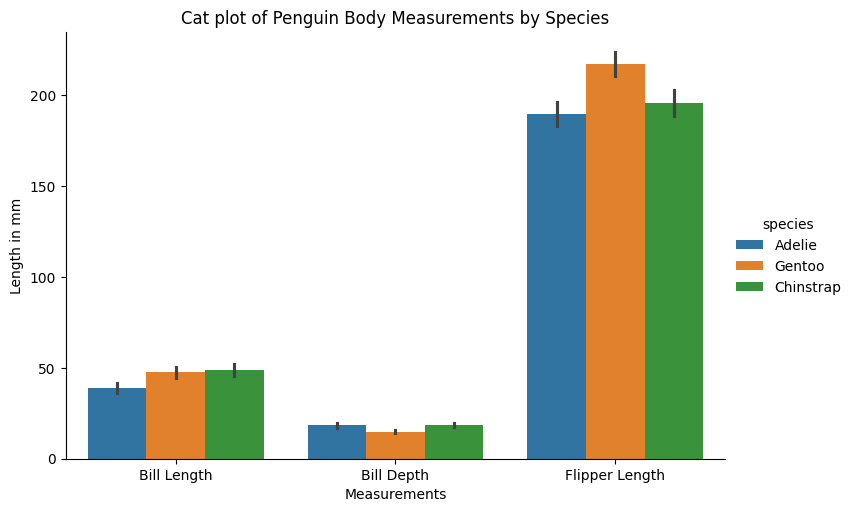

In [19]:
ax5 = sns.catplot(data=penguins_tidy, 
            x="metric", 
            y="cm", 
            hue="species",
            kind="bar",
            errorbar="sd",
            aspect=1.5
           )

# Get the figure's axes
ax = ax5.axes.flat[0]

# Set both the tick positions and labels
ax.set_xticks(range(len(["Bill Length", "Bill Depth", "Flipper Length"])))
ax.set_xticklabels(["Bill Length", "Bill Depth", "Flipper Length"])

# Set the other labels
ax5.set(xlabel="Measurements", 
        ylabel="Length in mm", 
        title="Cat plot of Penguin Body Measurements by Species")

`catplot` allows you to do plot different kinds of plots in the same format easily. Let's say we want to see a box plot:

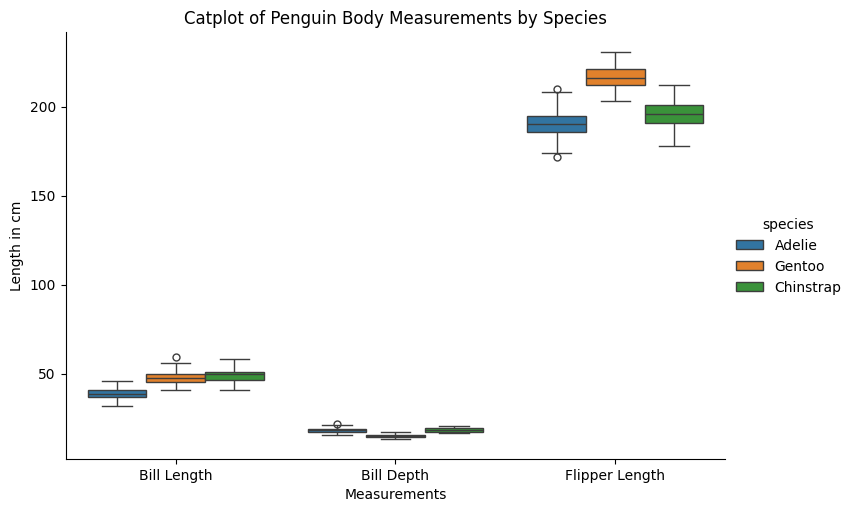

In [20]:
ax6 = sns.catplot(data=penguins_tidy, 
            kind="box", 
            x="metric",
            y="cm",
            hue="species",
            aspect=1.5
           )

# Get the figure's axes
ax = ax6.axes.flat[0]

# Set both the tick positions and labels
ax.set_xticks(range(len(["Bill Length", "Bill Depth", "Flipper Length"])))
ax.set_xticklabels(["Bill Length", "Bill Depth", "Flipper Length"])

# Set the other labels
ax6.set(xlabel="Measurements", 
        ylabel="Length in cm", 
        title="Catplot of Penguin Body Measurements by Species")

## Question 3: how does bill length vary with flipper length?
(Or, how do we explore the correlation between metrics?)

Next to the categorical plot, the scatter plot is a very useful visualization tool for biological experiments. Often we want to know how one variable is correlated with another, we can then use a scatterplot to easily take a quick look.

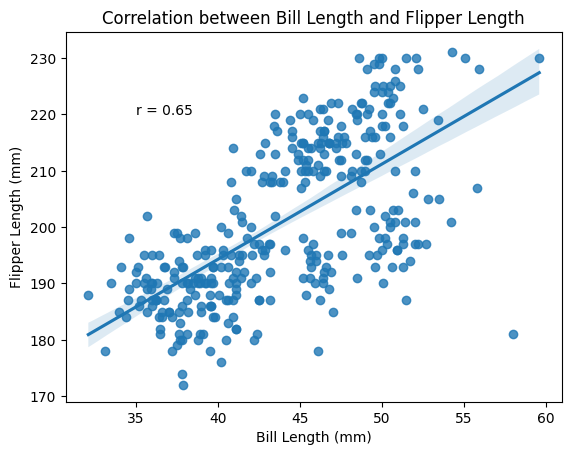

In [21]:
# Draw a scatteplot of petal width versus length with a simple linear regression line
ax7 = sns.regplot(data=penguins, 
                  x="bill_length_mm", 
                  y="flipper_length_mm",
                  ci=95)

from scipy.stats import pearsonr
pearsonsr, p = pearsonr(penguins.dropna()["bill_length_mm"], penguins.dropna()["flipper_length_mm"])
ax7.set(xlabel="Bill Length (mm)", ylabel="Flipper Length (mm)", title = "Correlation between Bill Length and Flipper Length");
# ax7. text(35, 220, f"r = {pearsonsr:.2f},\np = {p:.2f}") # Uncomment this line if you want to also present p-value.
ax7.text(35, 220, f"r = {pearsonsr:.2f}");

We see some clustering of the data points and we suspect the clusters correspond to the different species of penguins. Let"s colour the points by species.

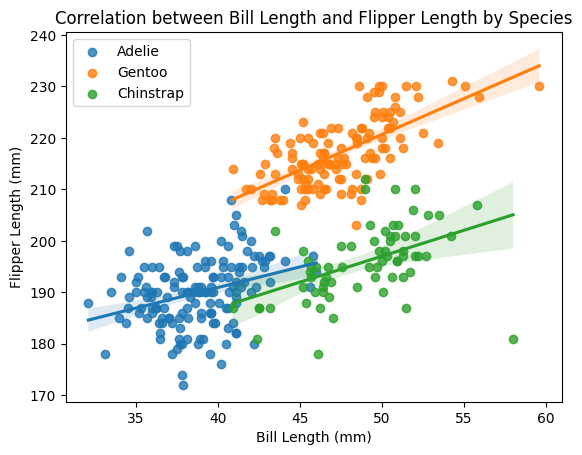

In [22]:
for s in penguins.species.unique():
    ax8 = sns.regplot(data=penguins.loc[penguins.species == s], 
                  ci=95,
                  x="bill_length_mm", 
                  y="flipper_length_mm", label = s)
    ax8.legend()
    
ax8.set(xlabel="Bill Length (mm)", ylabel="Flipper Length (mm)", title = "Correlation between Bill Length and Flipper Length by Species");


### Seaborn allows you to do that more systematically with pairplot

This is like doing a scatter plot for each pair of the variables in one go. On the diagonal, distributions of values within each species group are plotted for each variable.  



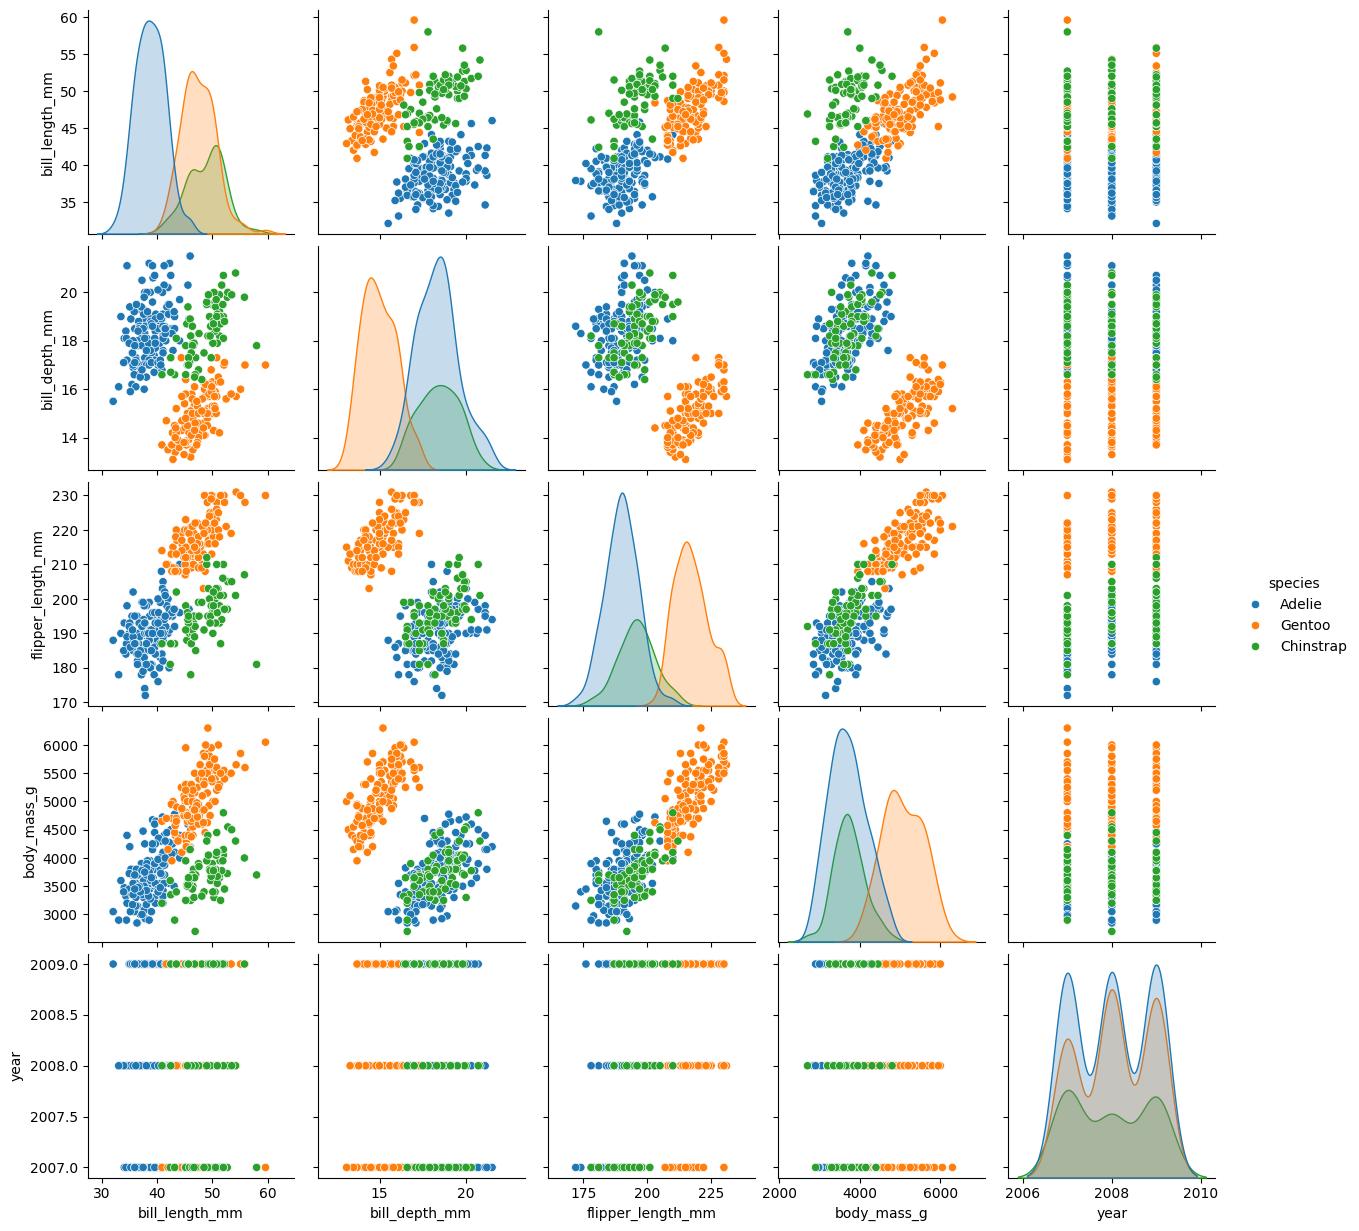

In [23]:
fig = sns.pairplot(penguins, hue="species")

We can see from the pair plots above that the relationshipship between all the metrics are complex and difficult to summary. If you have time, you can explore the bonus notebook, where we discuss how to concisely describe the data by reducing the dimentionality of this dataset [Bonus PCA Analysis](bonus_pca_analysis.html)

## Towards Publication-Ready Plots
Try to achieve as much of the final figure requirements as possible via code

In [24]:
penguins_all_metrics = penguins[["species", "bill_depth_mm", "bill_length_mm", "flipper_length_mm", "body_mass_g"]].dropna().reset_index(drop = True)
all_metrics = ["bill_depth_mm", "bill_length_mm", "flipper_length_mm", "body_mass_g"]

all_metrics


['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g']

In [25]:
y_titles = [ "Bill Length (mm)", "Bill Depth (mm)", "Flipper Length (mm)", "Body Mass (g)"]
letters = ["A", "B", "C", "D"]

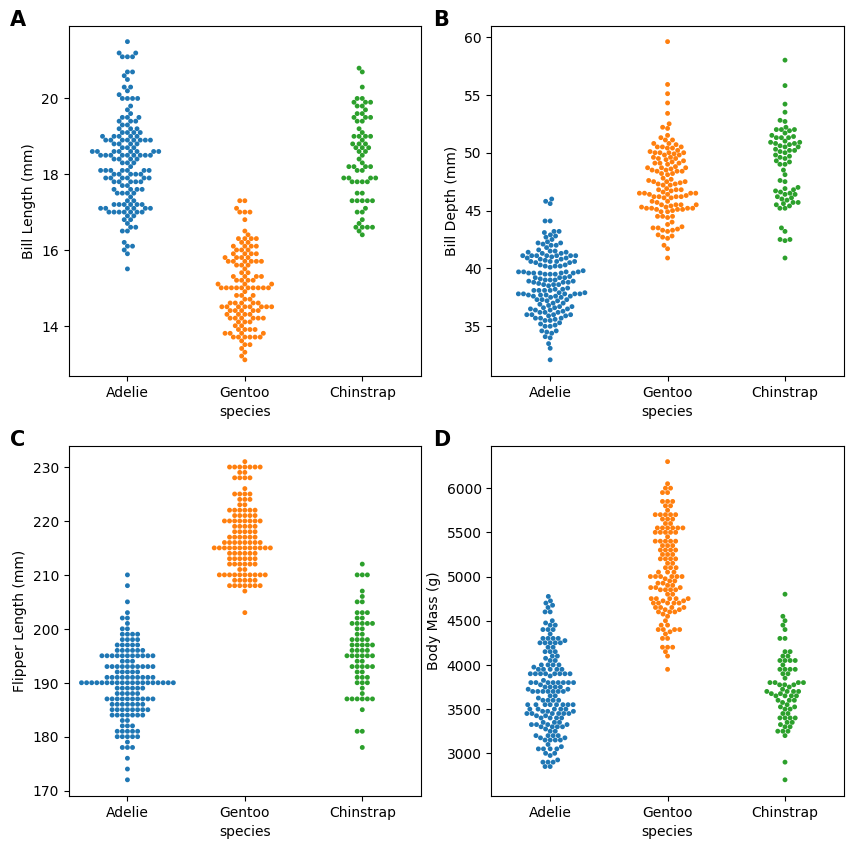

In [26]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(2, 2, figsize=(10, 10))

all_axes = ax.flatten()

for i, metric in enumerate(all_metrics):
    
    current_axes = all_axes[i]
    
    sns.swarmplot(data=penguins_all_metrics, size = 3.5, 
                  x="species", y=metric, hue = "species",
                  ax=current_axes)
    ylim = current_axes.get_ylim()
    current_axes.set(ylabel=y_titles[i])

    if i != 0:
        legend = current_axes.get_legend()
        if legend is not None:  # Only try to remove if legend exists
            legend.remove()
    current_axes.text(-1, ylim[1], letters[i], fontsize = 15, fontweight = "semibold")

In [27]:
f.savefig("myplot.svg")
f.savefig("myplot.png", dpi = 300)

### You have begun your journey as a data scientist

You can continue your data-visualization development with Claus Wilke’s free online [book](https://clauswilke.com/dataviz/index.html); it is not only a great introduction to data visualization, but also a style guide. It is written for the R programming language, but the principles are universal, and Python libraries like seaborn offer many of the same features.

![Florence Nightingale's Mortality Diagram](https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/Nightingale-mortality.jpg/1024px-Nightingale-mortality.jpg)

The "coxcomb" diagram shows the causes of mortality for British soldiers during the Crimean War 1853-56, with each wedge representing a month. The red sections indicate deaths from wounds, black from other causes, and the blue sections indicate deaths from preventable diseases. Nightingale used this visualization to illustrate how poor conditions were killing more soldiers than battle itself, thereby convincing military officials to improve sanitation in army hospitals. This pioneering work help establish data visualization as a powerful tool for communication and evidence-based decision making. It was created by Florence Nightingale in 1858, and represents one of the earliest examples of data visualization used for medical reform.